In [2]:
import pandas as pd

In [3]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pylab as plt 
%matplotlib inline
import seaborn as sns

In [4]:
from functions import check_nan as ckna

In [5]:
actors = pd.read_csv('../DATA/OLD/actor.csv')
acdf = actors.copy()

In [6]:
category = pd.read_csv('../DATA/OLD/category.csv')
catdf = category.copy()

In [7]:
language = pd.read_csv('../DATA/OLD/language.csv')
langdf = language.copy()

In [8]:
film = pd.read_csv('../DATA/OLD/film.csv')
filmdf = film.copy()

In [9]:
inventory = pd.read_csv('../DATA/OLD/inventory.csv')
invdf = inventory.copy()

In [10]:
old_HDD = pd.read_csv('../DATA/OLD/old_HDD.csv')
hdddf = old_HDD.copy()

In [11]:
rental = pd.read_csv('../DATA/OLD/rental.csv')
rentdf = rental.copy()

We import all the "most wanted" libraries, needed for data cleaning. 
Also, I have imported the functions.py where I have pasted Yona's function to visualy check the Nulls in any Data Frame.

We load all the .csv and name them to be able to take a look at what is inside and start making decisions.

This process I have done it previously and for that reason, we are going to see each one of the .csv separated and with its previous cleaning, but the first thing that I have done has been to load them all and print the first and the last ones to see a little the type of data.

We have a total of 7 data frames that correspond to: ACTORS, CATEGORY, MOVIE, INVENTORY, LANGUAGE, RENTAL AND ONE OLD one with info relevant to the people acting in the film, the title of the film, when it was released and the category.

To create the database for the movie rental company I would like to play a bit with the data frames to be able to make more interesting relationships later.

In particular, I would be interested in:

- Film: improve the language-relevant columns. Currently, the original language column has no values and the rental language is English for all. It would be interesting to introduce values relevant to the languages in which you can watch the movie. Nowadays and with the DVD format you can choose the type of language. 

I would also like to be able to introduce two new columns with the info relevant to the category (category_ID) and the people acting (actor_id).

- Rental: This is an important table and from a business point of view it should be fundamental. I would be interested in being able to offer the possibility to compare the rental day, the estimated delivery date, the actual delivery date and therefore if it was delivered late. The idea is to be able to then offer real data to the company about the customers, to know if they are reliable or not in the rentals and therefore reward those who are.

- Inventory: I would like to add the number of movies in stock in this table. Currently, we have in this table, data on the store where it is located, but in addition to that it would be interesting to know how many copies of each movie there are in each store, to assure the customer who calls to ask availability, that it exists.

- Old_HDD: I would like to add the actor_ID to each of the rows of information to facilitate the relationships between the different tables. This way we could create a relationship between movies and actors, many people want to see movies of certain actors only.

    
NEW TABLES: I think that, in the future, it could be interesting to create two new tables that could be very useful to manage '8Films'.

- Customer: Basic to be able to have control of our customers. 
    We need:
    - Customer_ID: identifier number.
    - First_Name: First name.
    - Last_Name: Last name.
    - Address: Address.
    - Joined_Date: member date.
    - Cancelled_Date: member cancellation date.
    - Credits: this video club will work with credits. 1 credit = 1 movie. In this section, you enter the credits that customers have.


- Store: We need some info about the stores we have. In principle, we only have 2, but we need to catalogue them to know where the movies are and where to go to look for them in case someone calls us to ask for availability.


In [12]:
acdf.head()

,actor_id,first_name,last_name,last_update
0,1,PENELOPE,GUINESS,2006-02-15 04:34:33
1,2,NICK,WAHLBERG,2006-02-15 04:34:33
2,3,ED,CHASE,2006-02-15 04:34:33
3,4,JENNIFER,DAVIS,2006-02-15 04:34:33
4,5,JOHNNY,LOLLOBRIGIDA,2006-02-15 04:34:33


In [13]:
acdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   actor_id     200 non-null    int64 
 1   first_name   200 non-null    object
 2   last_name    200 non-null    object
 3   last_update  200 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.4+ KB


N nan cols: 0
Series([], dtype: float64)


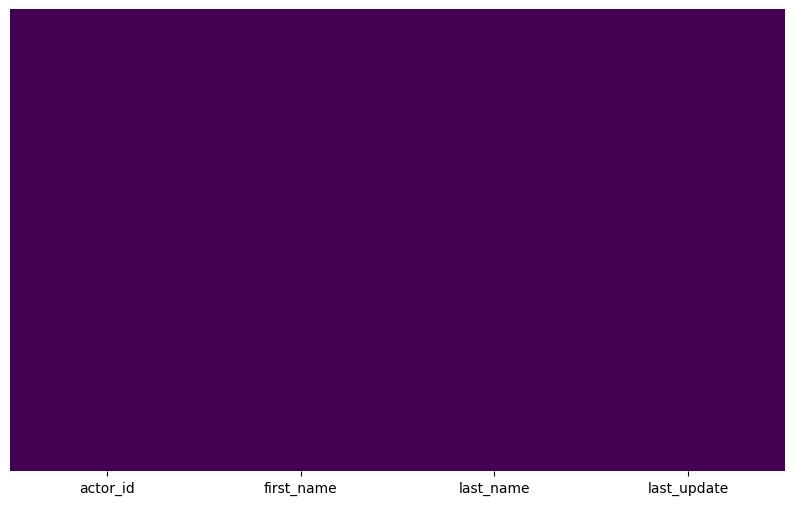

In [14]:
ckna(acdf)

In [15]:
new_acdf = acdf.drop_duplicates()

From actors table there should be not much to clean or even do. It seems there are not nulls so I don't believe we should much for now. Lets jump to the next table: Category.

In [16]:
catdf.head()

,category_id,name,last_update
0,1,Action,2006-02-15 04:46:27
1,2,Animation,2006-02-15 04:46:27
2,3,Children,2006-02-15 04:46:27
3,4,Classics,2006-02-15 04:46:27
4,5,Comedy,2006-02-15 04:46:27


In [17]:
catdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category_id  16 non-null     int64 
 1   name         16 non-null     object
 2   last_update  16 non-null     object
dtypes: int64(1), object(2)
memory usage: 512.0+ bytes


In [18]:
catdf.value_counts()    #I do this to check that there are not duplicated entries.

category_id  name         last_update        
1            Action       2006-02-15 04:46:27    1
2            Animation    2006-02-15 04:46:27    1
3            Children     2006-02-15 04:46:27    1
4            Classics     2006-02-15 04:46:27    1
5            Comedy       2006-02-15 04:46:27    1
6            Documentary  2006-02-15 04:46:27    1
7            Drama        2006-02-15 04:46:27    1
8            Family       2006-02-15 04:46:27    1
9            Foreign      2006-02-15 04:46:27    1
10           Games        2006-02-15 04:46:27    1
11           Horror       2006-02-15 04:46:27    1
12           Music        2006-02-15 04:46:27    1
13           New          2006-02-15 04:46:27    1
14           Sci-Fi       2006-02-15 04:46:27    1
15           Sports       2006-02-15 04:46:27    1
16           Travel       2006-02-15 04:46:27    1
Name: count, dtype: int64

N nan cols: 0
Series([], dtype: float64)


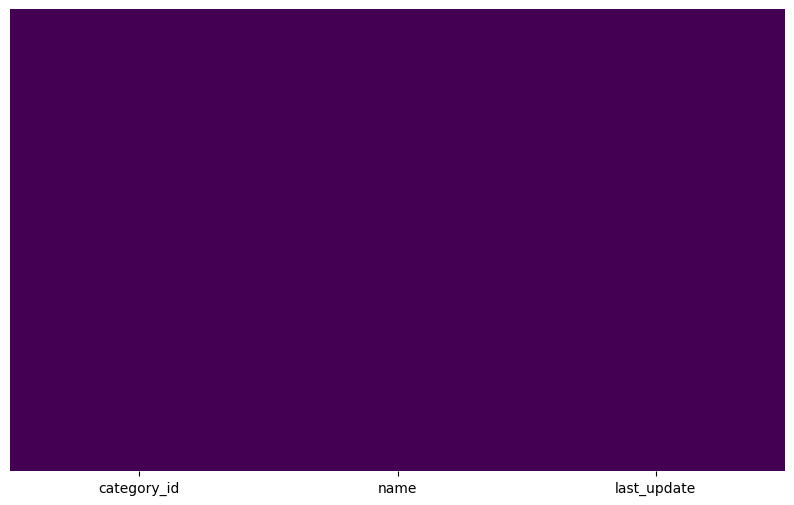

In [19]:
ckna(catdf)

In [20]:
new_catdf = catdf.drop_duplicates()

In [21]:
new_catdf.shape

(16, 3)

Categories dataset seems to be also quite clean, so once again we can skip to the next table. 
On a side note, I would like to check if the data frame which covers the films could have the category_ID so I can link it to this one in the future.

Next table: languages!

In [22]:
langdf.head()

,language_id,name,last_update
0,1,English,2006-02-15 05:02:19
1,2,Italian,2006-02-15 05:02:19
2,3,Japanese,2006-02-15 05:02:19
3,4,Mandarin,2006-02-15 05:02:19
4,5,French,2006-02-15 05:02:19


In [23]:
langdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   language_id  6 non-null      int64 
 1   name         6 non-null      object
 2   last_update  6 non-null      object
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes


In [24]:
langdf.value_counts()

language_id  name      last_update        
1            English   2006-02-15 05:02:19    1
2            Italian   2006-02-15 05:02:19    1
3            Japanese  2006-02-15 05:02:19    1
4            Mandarin  2006-02-15 05:02:19    1
5            French    2006-02-15 05:02:19    1
6            German    2006-02-15 05:02:19    1
Name: count, dtype: int64

Perhaps it could be useful to add some more rows regarding more langauges, such as:
- Spanish: language_id: 7 
- Korean: language_id: 8
- Indian: language_id: 9

In [25]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime('%Y-%m-%d %H:%M:%S')

In [26]:
new_rows = pd.DataFrame({'language_id': [7, 8, 9, 10, 0], 'name': ['Spanish', 'Portuguese', 'Korean', 'Indian', 'unknown'], 'last_update': [current_time, current_time, current_time, current_time, current_time]})

In [27]:
new_rows

,language_id,name,last_update
0,7,Spanish,2023-10-28 22:09:45
1,8,Portuguese,2023-10-28 22:09:45
2,9,Korean,2023-10-28 22:09:45
3,10,Indian,2023-10-28 22:09:45
4,0,unknown,2023-10-28 22:09:45


In [28]:
newlangdf = pd.concat([langdf, new_rows], ignore_index=True)
newlangdf

,language_id,name,last_update
0,1,English,2006-02-15 05:02:19
1,2,Italian,2006-02-15 05:02:19
2,3,Japanese,2006-02-15 05:02:19
3,4,Mandarin,2006-02-15 05:02:19
4,5,French,2006-02-15 05:02:19
5,6,German,2006-02-15 05:02:19
6,7,Spanish,2023-10-28 22:09:45
7,8,Portuguese,2023-10-28 22:09:45
8,9,Korean,2023-10-28 22:09:45
9,10,Indian,2023-10-28 22:09:45


N nan cols: 0
Series([], dtype: float64)


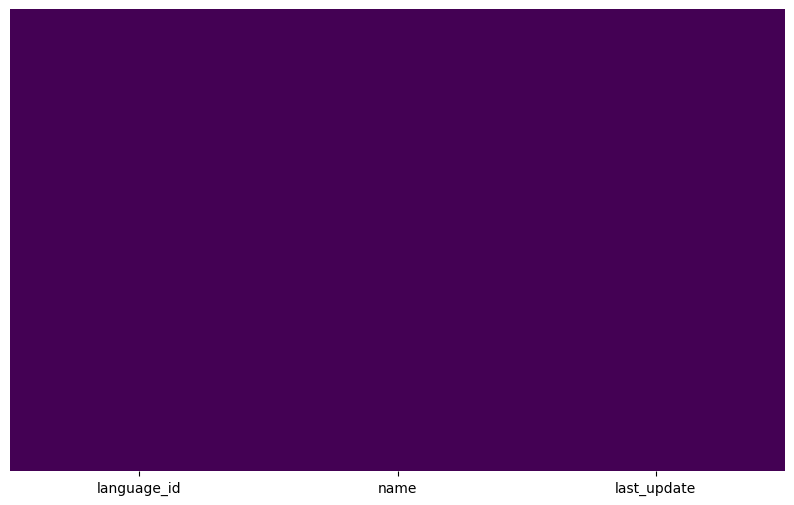

In [29]:
ckna(newlangdf)

Let's check now those dataframes where I want to do some changes.
As a little reminder:

- Film: improve the language-relevant columns. Currently, the original language column has no values and the rental language is English for all. It would be interesting to introduce values relevant to the languages in which you can watch the movie. Nowadays and with the DVD format you can choose the type of language. 

  I would also like to be able to introduce two new columns with the info relevant to the category (category_ID) and the people acting (actor_id).

In [30]:
filmdf.head()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,NaN,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,NaN,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2006-02-15 05:03:42
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,NaN,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2006-02-15 05:03:42
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,NaN,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2006-02-15 05:03:42
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,NaN,6,2.99,130,22.99,G,Deleted Scenes,2006-02-15 05:03:42


In [31]:
filmdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   film_id               1000 non-null   int64  
 1   title                 1000 non-null   object 
 2   description           1000 non-null   object 
 3   release_year          1000 non-null   int64  
 4   language_id           1000 non-null   int64  
 5   original_language_id  0 non-null      float64
 6   rental_duration       1000 non-null   int64  
 7   rental_rate           1000 non-null   float64
 8   length                1000 non-null   int64  
 9   replacement_cost      1000 non-null   float64
 10  rating                1000 non-null   object 
 11  special_features      1000 non-null   object 
 12  last_update           1000 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 101.7+ KB


N nan cols: 1
original_language_id    100.0
dtype: float64


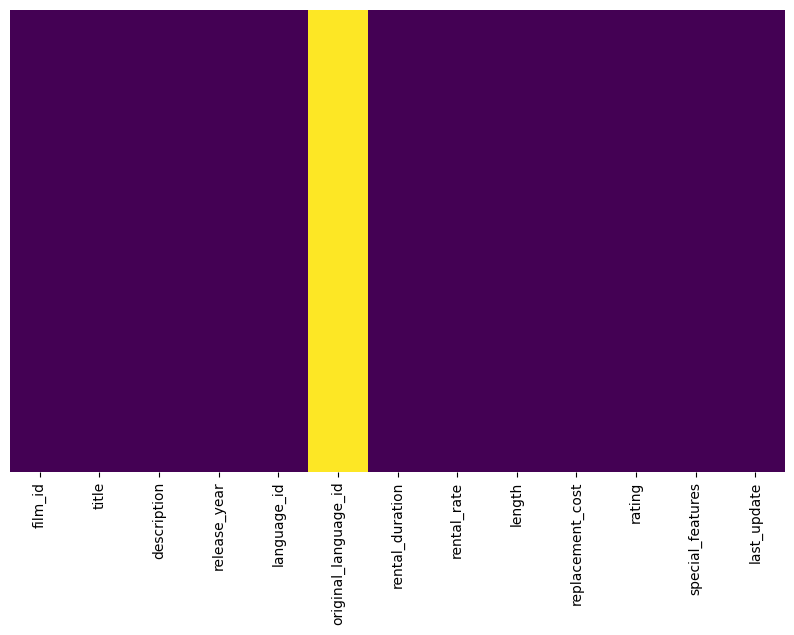

In [32]:
ckna(filmdf)

In [33]:
filmdf = filmdf.fillna(1)   #en otro mundo hubiera pillado la info relevante al pais de la peli para poner el idioma pero como no tengo esa info y las pelis son inventadas pues pongo el mismo idioma.

In [34]:
categorydf = pd.merge(filmdf, hdddf, on='title', how='left')

In [35]:
categorycolumn = categorydf['category_id']
categorycolumn
filmdf['category_id'] = categorycolumn

In [36]:
filmdf.head()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update,category_id
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,1.0,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42,6.0
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,1.0,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2006-02-15 05:03:42,6.0
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,1.0,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2006-02-15 05:03:42,6.0
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,1.0,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2006-02-15 05:03:42,6.0
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,1.0,6,2.99,130,22.99,G,Deleted Scenes,2006-02-15 05:03:42,11.0


As we can see, my new columns work but the values have a float type that I am not keen on, so I am going to change them into int64.

In [37]:
filmdf.dtypes

film_id                   int64
title                    object
description              object
release_year              int64
language_id               int64
original_language_id    float64
rental_duration           int64
rental_rate             float64
length                    int64
replacement_cost        float64
rating                   object
special_features         object
last_update              object
category_id             float64
dtype: object

In [38]:
filmdf['original_language_id'] = filmdf.original_language_id.astype('int64')

In [39]:
filmdf = filmdf.fillna(0)

In [40]:
filmdf['category_id'] = filmdf.category_id.astype('int64')

In [41]:
filmdf.head()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update,category_id
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42,6
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,1,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2006-02-15 05:03:42,6
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,1,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2006-02-15 05:03:42,6
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,1,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2006-02-15 05:03:42,6
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,1,6,2.99,130,22.99,G,Deleted Scenes,2006-02-15 05:03:42,11


Next data frame is INVENTORY:

In [43]:
invdf.head()

,inventory_id,film_id,store_id,last_update
0,1,1,1,2006-02-15 05:09:17
1,2,1,1,2006-02-15 05:09:17
2,3,1,1,2006-02-15 05:09:17
3,4,1,1,2006-02-15 05:09:17
4,5,1,2,2006-02-15 05:09:17


In [44]:
invdf.store_id.unique()

array([1, 2])

In [45]:
len(invdf.inventory_id.unique())

1000

In [92]:
len(invdf.film_id.unique())

207

We can see the movies in each store and therefore we can check how many there are and where to find them.

As we can see, there are only two store IDs so I am going to take into consideration that there are two stores and that this table would help me check if there are any available copies in case someone asks.

Alse we see that there are a total of 1000 movies in the videoclub, well, being honest there are 1000 copies. Because individual movies there are only 207 movies.

In [47]:
invdf.groupby(['film_id', 'store_id']).count()['inventory_id'] #whith a simple groupby I can check the amount of copies of each film in each store.

film_id  store_id
1        1           4
         2           4
2        2           3
3        2           4
4        1           4
                    ..
220      1           4
         2           4
222      1           2
         2           4
223      2           2
Name: inventory_id, Length: 329, dtype: int64

In [95]:
newinventorydf = invdf.drop_duplicates()

N nan cols: 0
Series([], dtype: float64)


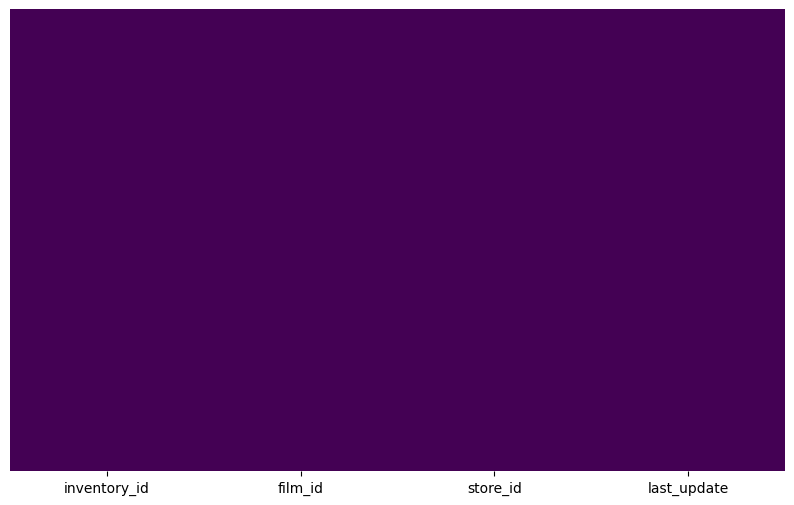

In [96]:
ckna(newinventorydf)

Let's have a look at the old database:
OLD_HDD is a table with some info regarding movies and the actors that played the part. 

In [49]:
hdddf.head()

,first_name,last_name,title,release_year,category_id
0,PENELOPE,GUINESS,ACADEMY DINOSAUR,2006,6
1,PENELOPE,GUINESS,ANACONDA CONFESSIONS,2006,2
2,PENELOPE,GUINESS,ANGELS LIFE,2006,13
3,PENELOPE,GUINESS,BULWORTH COMMANDMENTS,2006,10
4,PENELOPE,GUINESS,CHEAPER CLYDE,2006,14


It comes with the movie title and it's category. It could be usefull to add a new column with the actor_id so I can link it to the film table and therefore I can have the list of actors and their movies.

In [50]:
hdddf['name'] = hdddf[['first_name', 'last_name']].agg(' '.join, axis=1)
hdddf.head()

,first_name,last_name,title,release_year,category_id,name
0,PENELOPE,GUINESS,ACADEMY DINOSAUR,2006,6,PENELOPE GUINESS
1,PENELOPE,GUINESS,ANACONDA CONFESSIONS,2006,2,PENELOPE GUINESS
2,PENELOPE,GUINESS,ANGELS LIFE,2006,13,PENELOPE GUINESS
3,PENELOPE,GUINESS,BULWORTH COMMANDMENTS,2006,10,PENELOPE GUINESS
4,PENELOPE,GUINESS,CHEAPER CLYDE,2006,14,PENELOPE GUINESS


In [51]:
acdf['name'] = acdf[['first_name', 'last_name']].agg(' '.join, axis=1)
acdf.head()

,actor_id,first_name,last_name,last_update,name
0,1,PENELOPE,GUINESS,2006-02-15 04:34:33,PENELOPE GUINESS
1,2,NICK,WAHLBERG,2006-02-15 04:34:33,NICK WAHLBERG
2,3,ED,CHASE,2006-02-15 04:34:33,ED CHASE
3,4,JENNIFER,DAVIS,2006-02-15 04:34:33,JENNIFER DAVIS
4,5,JOHNNY,LOLLOBRIGIDA,2006-02-15 04:34:33,JOHNNY LOLLOBRIGIDA


In [56]:
actorshdd = pd.merge(hdddf, acdf, on='name', how='left')
actorshdd.head()

,first_name_x,last_name_x,title,release_year,category_id,name,actor_id,first_name_y,last_name_y,last_update
0,PENELOPE,GUINESS,ACADEMY DINOSAUR,2006,6,PENELOPE GUINESS,1,PENELOPE,GUINESS,2006-02-15 04:34:33
1,PENELOPE,GUINESS,ANACONDA CONFESSIONS,2006,2,PENELOPE GUINESS,1,PENELOPE,GUINESS,2006-02-15 04:34:33
2,PENELOPE,GUINESS,ANGELS LIFE,2006,13,PENELOPE GUINESS,1,PENELOPE,GUINESS,2006-02-15 04:34:33
3,PENELOPE,GUINESS,BULWORTH COMMANDMENTS,2006,10,PENELOPE GUINESS,1,PENELOPE,GUINESS,2006-02-15 04:34:33
4,PENELOPE,GUINESS,CHEAPER CLYDE,2006,14,PENELOPE GUINESS,1,PENELOPE,GUINESS,2006-02-15 04:34:33


In [57]:
hdddf['actor_id'] = actorshdd['actor_id']
hdddf.head()

,first_name,last_name,title,release_year,category_id,name,actor_id
0,PENELOPE,GUINESS,ACADEMY DINOSAUR,2006,6,PENELOPE GUINESS,1
1,PENELOPE,GUINESS,ANACONDA CONFESSIONS,2006,2,PENELOPE GUINESS,1
2,PENELOPE,GUINESS,ANGELS LIFE,2006,13,PENELOPE GUINESS,1
3,PENELOPE,GUINESS,BULWORTH COMMANDMENTS,2006,10,PENELOPE GUINESS,1
4,PENELOPE,GUINESS,CHEAPER CLYDE,2006,14,PENELOPE GUINESS,1


This way I can link it now to the film table and add the actor ID. Why? Because sometimes people wants to watch movies from an actor who they like.

In [61]:
actorID = pd.merge(filmdf, hdddf, on='title', how='left')
actorID.head()

,film_id,title,description,release_year_x,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update,category_id_x,first_name,last_name,release_year_y,category_id_y,name,actor_id
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42,6,PENELOPE,GUINESS,2006.0,6.0,PENELOPE GUINESS,1.0
1,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42,6,CHRISTIAN,GABLE,2006.0,6.0,CHRISTIAN GABLE,10.0
2,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42,6,LUCILLE,TRACY,2006.0,6.0,LUCILLE TRACY,20.0
3,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42,6,SANDRA,PECK,2006.0,6.0,SANDRA PECK,30.0
4,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,1,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2006-02-15 05:03:42,6,BOB,FAWCETT,2006.0,11.0,BOB FAWCETT,19.0


In [63]:
filmdf['actor_id'] = actorID['actor_id']
filmdf.head()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update,category_id,actor_id
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42,6,1.0
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,1,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2006-02-15 05:03:42,6,10.0
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,1,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2006-02-15 05:03:42,6,20.0
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,1,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2006-02-15 05:03:42,6,30.0
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,1,6,2.99,130,22.99,G,Deleted Scenes,2006-02-15 05:03:42,11,19.0


In [64]:
filmdf['actor_id']=filmdf.actor_id.fillna(0)
filmdf['actor_id'] = filmdf.actor_id.astype('int64')
filmdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   film_id               1000 non-null   int64  
 1   title                 1000 non-null   object 
 2   description           1000 non-null   object 
 3   release_year          1000 non-null   int64  
 4   language_id           1000 non-null   int64  
 5   original_language_id  1000 non-null   int64  
 6   rental_duration       1000 non-null   int64  
 7   rental_rate           1000 non-null   float64
 8   length                1000 non-null   int64  
 9   replacement_cost      1000 non-null   float64
 10  rating                1000 non-null   object 
 11  special_features      1000 non-null   object 
 12  last_update           1000 non-null   object 
 13  category_id           1000 non-null   int64  
 14  actor_id              1000 non-null   int64  
dtypes: float64(2), int64(8

In [104]:
new_filmdf = filmdf.drop_duplicates()

We can check now if the hdddf has any Null values and if there are any duplicates and if it is ok we can export it at the end.

In [106]:
new_hdddf = hdddf.drop_duplicates()

N nan cols: 0
Series([], dtype: float64)


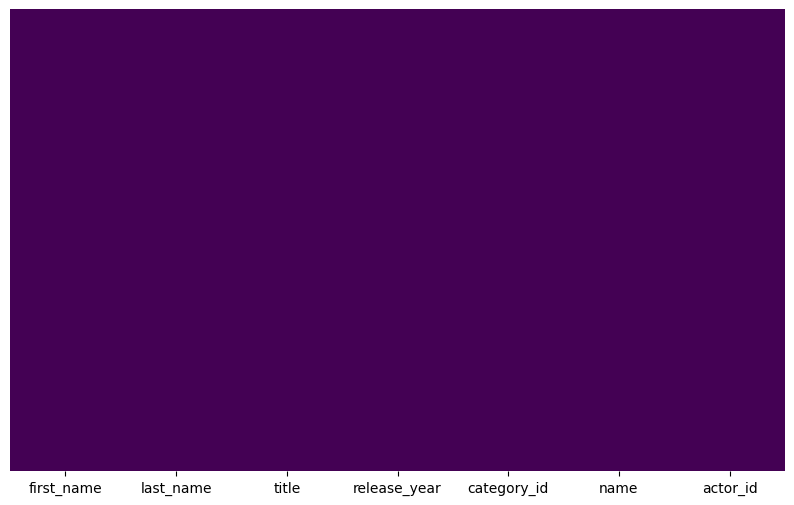

In [107]:
ckna(new_hdddf)

Let's have a look at the rental table before creating our customer, store and staff tables.

In [66]:
rentdf.head()

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1,2005-05-24 22:53:30,367,130,2005-05-26 22:04:30,1,2006-02-15 21:30:53
1,2,2005-05-24 22:54:33,1525,459,2005-05-28 19:40:33,1,2006-02-15 21:30:53
2,3,2005-05-24 23:03:39,1711,408,2005-06-01 22:12:39,1,2006-02-15 21:30:53
3,4,2005-05-24 23:04:41,2452,333,2005-06-03 01:43:41,2,2006-02-15 21:30:53
4,5,2005-05-24 23:05:21,2079,222,2005-06-02 04:33:21,1,2006-02-15 21:30:53


As we can see, there is a rentalID which gives us a code to retrieve, a rental date and a return date, the inventoryID to see the direct copy of the movie the customer took home, the customer who took it and the last time it was updated.

This table works as an invoice for any other store, you have the client, the product, the when, where and who assisted. It could be cool if this table could help to check whose client are more or less inclined to return the movies late. Let's say for the shake of it, that we have a return policy or 3 days. Anybody who returns the movie after those first three days would be late and therefore can be labeled as such.

In [67]:
rentdf = rentdf.reindex(columns=['rental_id', 'inventory_id', 'customer_id', 'staff_id','rental_date','return_date','last_update'])
rentdf.head()


,rental_id,inventory_id,customer_id,staff_id,rental_date,return_date,last_update
0,1,367,130,1,2005-05-24 22:53:30,2005-05-26 22:04:30,2006-02-15 21:30:53
1,2,1525,459,1,2005-05-24 22:54:33,2005-05-28 19:40:33,2006-02-15 21:30:53
2,3,1711,408,1,2005-05-24 23:03:39,2005-06-01 22:12:39,2006-02-15 21:30:53
3,4,2452,333,2,2005-05-24 23:04:41,2005-06-03 01:43:41,2006-02-15 21:30:53
4,5,2079,222,1,2005-05-24 23:05:21,2005-06-02 04:33:21,2006-02-15 21:30:53


In [68]:
rentdf['rental_date'] = pd.to_datetime(rentdf['rental_date'])
rentdf['return_date'] = pd.to_datetime(rentdf['return_date'])


In [69]:
rentdf['rental_time'] = rentdf.rental_date.dt.time
rentdf['rental_date'] = rentdf.rental_date.dt.date
rentdf.head()

,rental_id,inventory_id,customer_id,staff_id,rental_date,return_date,last_update,rental_time
0,1,367,130,1,2005-05-24,2005-05-26 22:04:30,2006-02-15 21:30:53,22:53:30
1,2,1525,459,1,2005-05-24,2005-05-28 19:40:33,2006-02-15 21:30:53,22:54:33
2,3,1711,408,1,2005-05-24,2005-06-01 22:12:39,2006-02-15 21:30:53,23:03:39
3,4,2452,333,2,2005-05-24,2005-06-03 01:43:41,2006-02-15 21:30:53,23:04:41
4,5,2079,222,1,2005-05-24,2005-06-02 04:33:21,2006-02-15 21:30:53,23:05:21


In [70]:
rentdf['return_time'] = rentdf.return_date.dt.time
rentdf['return_date'] = rentdf.return_date.dt.date
rentdf.head()

,rental_id,inventory_id,customer_id,staff_id,rental_date,return_date,last_update,rental_time,return_time
0,1,367,130,1,2005-05-24,2005-05-26,2006-02-15 21:30:53,22:53:30,22:04:30
1,2,1525,459,1,2005-05-24,2005-05-28,2006-02-15 21:30:53,22:54:33,19:40:33
2,3,1711,408,1,2005-05-24,2005-06-01,2006-02-15 21:30:53,23:03:39,22:12:39
3,4,2452,333,2,2005-05-24,2005-06-03,2006-02-15 21:30:53,23:04:41,01:43:41
4,5,2079,222,1,2005-05-24,2005-06-02,2006-02-15 21:30:53,23:05:21,04:33:21


In [71]:
rentdf = rentdf.reindex(columns=['rental_id', 'inventory_id', 'customer_id', 'staff_id','rental_date','rental_time','return_date','return_time','last_update'])
rentdf.head()

,rental_id,inventory_id,customer_id,staff_id,rental_date,rental_time,return_date,return_time,last_update
0,1,367,130,1,2005-05-24,22:53:30,2005-05-26,22:04:30,2006-02-15 21:30:53
1,2,1525,459,1,2005-05-24,22:54:33,2005-05-28,19:40:33,2006-02-15 21:30:53
2,3,1711,408,1,2005-05-24,23:03:39,2005-06-01,22:12:39,2006-02-15 21:30:53
3,4,2452,333,2,2005-05-24,23:04:41,2005-06-03,01:43:41,2006-02-15 21:30:53
4,5,2079,222,1,2005-05-24,23:05:21,2005-06-02,04:33:21,2006-02-15 21:30:53


There is something bothering me here. If you check the inventory_id, it looks quite odd the fact that you have id numbers over 1000 when we already checked the inventory files and it only has about a thousand inventory IDs. I think this must be wrong and for the shake of the exercise I am going to change those in order to match the inventory table.

In [72]:
import random
def inventory_change(inventoryID):
    return random.randint(1,1000)
    

In [73]:
rentdf['inventory_id'] = rentdf.inventory_id.apply(inventory_change)
rentdf.head()

,rental_id,inventory_id,customer_id,staff_id,rental_date,rental_time,return_date,return_time,last_update
0,1,757,130,1,2005-05-24,22:53:30,2005-05-26,22:04:30,2006-02-15 21:30:53
1,2,623,459,1,2005-05-24,22:54:33,2005-05-28,19:40:33,2006-02-15 21:30:53
2,3,781,408,1,2005-05-24,23:03:39,2005-06-01,22:12:39,2006-02-15 21:30:53
3,4,861,333,2,2005-05-24,23:04:41,2005-06-03,01:43:41,2006-02-15 21:30:53
4,5,962,222,1,2005-05-24,23:05:21,2005-06-02,04:33:21,2006-02-15 21:30:53


And I am going to do the same with the customers ID column. I will create later on the tables relating to the customers, staff and stores but I can start limiting the amount of customers I have between the two stores by a 100.

In [74]:
def customer_change(customerID):
    return random.randint(1,100)

In [75]:
rentdf['customer_id'] = rentdf.inventory_id.apply(customer_change)
rentdf.head()

,rental_id,inventory_id,customer_id,staff_id,rental_date,rental_time,return_date,return_time,last_update
0,1,757,50,1,2005-05-24,22:53:30,2005-05-26,22:04:30,2006-02-15 21:30:53
1,2,623,63,1,2005-05-24,22:54:33,2005-05-28,19:40:33,2006-02-15 21:30:53
2,3,781,97,1,2005-05-24,23:03:39,2005-06-01,22:12:39,2006-02-15 21:30:53
3,4,861,80,2,2005-05-24,23:04:41,2005-06-03,01:43:41,2006-02-15 21:30:53
4,5,962,73,1,2005-05-24,23:05:21,2005-06-02,04:33:21,2006-02-15 21:30:53


In [109]:
rentdf.shape

(1000, 9)

In [110]:
new_rentdf = rentdf.drop_duplicates()

My rental table is complete, so now the last things to do are to create the tables regarding: clients, staff and stores.

I am going to start with the stores table, it is the simplest out of the three and also it is good as practice.

In [76]:
stores={'Store_ID': [1,2], 'Address': ['C/ de Hortaleza, 69, 28004 Madrid','C/ de García de Paredes, 33, 28010 Madrid'], 'Phone':[666666666,888888888], 'email':['8filmshortaleza@8films.com','8filmsparedes@8films.com']}

storesdf = pd.DataFrame(stores)
storesdf.head()

,Store_ID,Address,Phone,email
0,1,"C/ de Hortaleza, 69, 28004 Madrid",666666666,8filmshortaleza@8films.com
1,2,"C/ de García de Paredes, 33, 28010 Madrid",888888888,8filmsparedes@8films.com


It looks ok and for now, this will help to create a new link in our database. 

Let's continue with the tables regarding staff and customers. For the staff I am only going to hire 4 people, 2 for each store. And for that I am going to use a library that some colleagues have found: Faker.

In [77]:
from faker import Faker

In [78]:
def random_staff(num_staff):
    fake = Faker()
    domain = "8films.com"
    staff = []

    
    for i in range(num_staff):
        staff_id = i
        full_name = fake.name()
        surname, name = full_name.split(" ")
        address = fake.address()
        phone = fake.phone_number()
        email = f"{name.replace(' ', '.')}@{domain}"
        staff.append({"staff_id": staff_id, "name": name, "surname": surname, "address": address, "phone": phone, "email": email})
    
    return staff

staff = random_staff(4)

staff

[{'staff_id': 0,
  'name': 'Bond',
  'surname': 'Tina',
  'address': '30318 Courtney Mission\nMartinfurt, IN 42321',
  'phone': '(662)243-2197x6502',
  'email': 'Bond@8films.com'},
 {'staff_id': 1,
  'name': 'Miller',
  'surname': 'Anna',
  'address': '671 Garcia Divide Apt. 353\nPort Timothyview, AK 62216',
  'phone': '(661)202-6555',
  'email': 'Miller@8films.com'},
 {'staff_id': 2,
  'name': 'Franco',
  'surname': 'Amanda',
  'address': '691 Julie Parkway\nSouth Erintown, FM 86209',
  'phone': '001-471-993-4868',
  'email': 'Franco@8films.com'},
 {'staff_id': 3,
  'name': 'Smith',
  'surname': 'Diana',
  'address': '79037 Cooke Circle\nNew Adrienne, NY 73126',
  'phone': '(736)957-6656',
  'email': 'Smith@8films.com'}]

In [79]:
staffdf = pd.DataFrame(staff)
staffdf

,staff_id,name,surname,address,phone,email
0,0,Bond,Tina,"30318 Courtney Mission\nMartinfurt, IN 42321",(662)243-2197x6502,Bond@8films.com
1,1,Miller,Anna,"671 Garcia Divide Apt. 353\nPort Timothyview, ...",(661)202-6555,Miller@8films.com
2,2,Franco,Amanda,"691 Julie Parkway\nSouth Erintown, FM 86209",001-471-993-4868,Franco@8films.com
3,3,Smith,Diana,"79037 Cooke Circle\nNew Adrienne, NY 73126",(736)957-6656,Smith@8films.com


And here we have our amazingly willing staff members.

Lets get some clients, shall we?

In [80]:
def random_customers(num_customers):
    fake = Faker()
    domain = "gmail.com"
    customers = []
    
    for i in range(num_customers):
        id = i
        full_name = fake.name()
        address = fake.address()
        phone = fake.phone_number()
        email = f"{full_name.replace(' ', '.')}@{domain}"
        customers.append({"customer_id": id, "name": full_name, "address": address, "phone": phone, "email": email})
    
    return customers

customers = random_customers(100)

[{'customer_id': 0,
  'name': 'Laura Allen',
  'address': '1054 Walker Grove Suite 667\nLake Jason, FL 24823',
  'phone': '(667)703-0283x32880',
  'email': 'Laura.Allen@gmail.com'},
 {'customer_id': 1,
  'name': 'Justin Murphy',
  'address': '43737 Brandon Vista Apt. 512\nTracychester, PW 90710',
  'phone': '(562)896-2722x3551',
  'email': 'Justin.Murphy@gmail.com'},
 {'customer_id': 2,
  'name': 'Laura Weiss',
  'address': '6380 Angela Ridges\nEast Annabury, SC 27332',
  'phone': '(487)421-8336x790',
  'email': 'Laura.Weiss@gmail.com'},
 {'customer_id': 3,
  'name': 'Christopher Adams',
  'address': '4395 Perkins Curve Suite 151\nWest Timothymouth, NY 87590',
  'phone': '7232539219',
  'email': 'Christopher.Adams@gmail.com'},
 {'customer_id': 4,
  'name': 'David Smith',
  'address': '2479 Elizabeth Center Suite 497\nDerrickberg, MT 51008',
  'phone': '3359571577',
  'email': 'David.Smith@gmail.com'},
 {'customer_id': 5,
  'name': 'Kathryn Jackson',
  'address': '97654 Rodriguez Forks 

In [81]:
customersdf = pd.DataFrame(customers)
customersdf.head()

,customer_id,name,address,phone,email
0,0,Laura Allen,"1054 Walker Grove Suite 667\nLake Jason, FL 24823",(667)703-0283x32880,Laura.Allen@gmail.com
1,1,Justin Murphy,"43737 Brandon Vista Apt. 512\nTracychester, PW...",(562)896-2722x3551,Justin.Murphy@gmail.com
2,2,Laura Weiss,"6380 Angela Ridges\nEast Annabury, SC 27332",(487)421-8336x790,Laura.Weiss@gmail.com
3,3,Christopher Adams,4395 Perkins Curve Suite 151\nWest Timothymout...,7232539219,Christopher.Adams@gmail.com
4,4,David Smith,"2479 Elizabeth Center Suite 497\nDerrickberg, ...",3359571577,David.Smith@gmail.com


Now we can export our new tables one by one and import those into MySQL Workbench.

In [98]:
new_acdf.to_csv('../DATA/CLEAN/clean_actors.csv')

In [99]:
new_catdf.to_csv('../DATA/CLEAN/clean_catalogue.csv')

In [100]:
newlangdf.to_csv('../DATA/CLEAN/clean_language.csv')

In [97]:
newinventorydf.to_csv('../DATA/CLEAN/clean_inventory.csv')

In [108]:
new_hdddf.to_csv('../DATA/CLEAN/clean_hdddf.csv')

In [105]:
new_filmdf.to_csv('../DATA/CLEAN/clean_films.csv')

In [111]:
new_rentdf.to_csv('../DATA/CLEAN/clean_rental.csv')

In [103]:
storesdf.to_csv('../DATA/CLEAN/clean_stores.csv')

In [102]:
staffdf.to_csv('../DATA/CLEAN/clean_staff.csv')

In [101]:
customersdf.to_csv('../DATA/CLEAN/clean_customers.csv')